In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.tsa.stattools import adatauller
%matplotlib inline


In [3]:
data=pd.read_csv("C:/Users/Acer/Downloads/MonthWiseMarketArrivals_Clean.csv")

In [5]:
data.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
0,ABOHAR(PB),January,2005,2350,404,493,446,PB,ABOHAR,January-2005
1,ABOHAR(PB),January,2006,900,487,638,563,PB,ABOHAR,January-2006
2,ABOHAR(PB),January,2010,790,1283,1592,1460,PB,ABOHAR,January-2010
3,ABOHAR(PB),January,2011,245,3067,3750,3433,PB,ABOHAR,January-2011
4,ABOHAR(PB),January,2012,1035,523,686,605,PB,ABOHAR,January-2012


In [25]:
data.shape

(10227, 10)

In [6]:
data.isna().sum()

market      0
month       0
year        0
quantity    0
priceMin    0
priceMax    0
priceMod    0
state       0
city        0
date        0
dtype: int64

In [7]:
data.dtypes


market      object
month       object
year         int64
quantity     int64
priceMin     int64
priceMax     int64
priceMod     int64
state       object
city        object
date        object
dtype: object

In [8]:
data.describe()

,year,quantity,priceMin,priceMax,priceMod
count,10227.000000,1.022700e+04,10227.000000,10227.000000,10227.000000
mean,2009.022294,7.660488e+04,646.944363,1212.760731,984.284345
std,4.372841,1.244087e+05,673.121850,979.658874,818.471498
min,1996.000000,2.000000e+01,16.000000,145.000000,80.000000
25%,2006.000000,8.898000e+03,209.000000,557.000000,448.000000
50%,2009.000000,2.746000e+04,440.000000,923.000000,747.000000
75%,2013.000000,8.835650e+04,828.000000,1527.000000,1248.000000
max,2016.000000,1.639032e+06,6000.000000,8192.000000,6400.000000


In [9]:
data.state.unique()

array(['PB', 'UP', 'GUJ', 'MS', 'RAJ', 'KNT', 'MP', 'OR', 'BHR', 'WB',
       'CH', 'TN', 'DEL', 'ASM', 'AP', 'JK', 'HR', 'KER', 'JH', 'HP',
       'KEL'], dtype=object)

In [10]:
index = pd.to_datetime(data.date)
data.date = pd.DatetimeIndex(data.date)
data.index

RangeIndex(start=0, stop=10227, step=1)

In [11]:
data.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
0,ABOHAR(PB),January,2005,2350,404,493,446,PB,ABOHAR,2005-01-01
1,ABOHAR(PB),January,2006,900,487,638,563,PB,ABOHAR,2006-01-01
2,ABOHAR(PB),January,2010,790,1283,1592,1460,PB,ABOHAR,2010-01-01
3,ABOHAR(PB),January,2011,245,3067,3750,3433,PB,ABOHAR,2011-01-01
4,ABOHAR(PB),January,2012,1035,523,686,605,PB,ABOHAR,2012-01-01


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10227 entries, 0 to 10226
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   market    10227 non-null  object        
 1   month     10227 non-null  object        
 2   year      10227 non-null  int64         
 3   quantity  10227 non-null  int64         
 4   priceMin  10227 non-null  int64         
 5   priceMax  10227 non-null  int64         
 6   priceMod  10227 non-null  int64         
 7   state     10227 non-null  object        
 8   city      10227 non-null  object        
 9   date      10227 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(5), object(4)
memory usage: 799.1+ KB


In [13]:
pd.unique(data.city)

array(['ABOHAR', 'AGRA', 'AHMEDABAD', 'AHMEDNAGAR', 'AJMER', 'ALIGARH',
       'ALWAR', 'AMRITSAR', 'BALLIA', 'BANGALORE', 'BAREILLY', 'BELGAUM',
       'BHATINDA', 'BHAVNAGAR', 'BHOPAL', 'BHUBNESWER', 'BIHARSHARIF',
       'BIJAPUR', 'BIKANER', 'BOMBORI', 'BURDWAN', 'CHAKAN', 'CHALLAKERE',
       'CHANDIGARH', 'CHANDVAD', 'CHENNAI', 'CHICKBALLAPUR', 'COIMBATORE',
       'DEESA', 'DEHRADOON', 'DELHI', 'DEORIA', 'DEVALA', 'DEWAS',
       'DHAVANGERE', 'DHULIA', 'DINDIGUL', 'DINDORI', 'ETAWAH', 'GONDAL',
       'GORAKHPUR', 'GUWAHATI', 'HALDWANI', 'HASSAN', 'HOSHIARPUR',
       'HUBLI', 'HYDERABAD', 'INDORE', 'JAIPUR', 'JALANDHAR', 'JALGAON',
       'JAMMU', 'JAMNAGAR', 'JODHPUR', 'JUNNAR', 'KALVAN', 'KANPUR',
       'KARNAL', 'KHANNA', 'KOLAR', 'KOLHAPUR', 'KOLKATA', 'KOPERGAON',
       'KOTA', 'KURNOOL', 'LASALGAON', 'LONAND', 'LUCKNOW', 'LUDHIANA',
       'MADURAI', 'MAHUVA', 'MALEGAON', 'MANDSOUR', 'MANMAD', 'MEERUT',
       'MIDNAPUR', 'MUMBAI', 'NAGPUR', 'NANDGAON', 'NASIK', 'NEEMU

# Modal price of onion for each month for the Mumbai market


Let us try to do this examination for one of the year only. So we want to reduce our dataframe for only where the year = 2012

This process is called subset.

In [14]:
data2012 = data[data.year ==2012]
data2012.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
4,ABOHAR(PB),January,2012,1035,523,686,605,PB,ABOHAR,2012-01-01
12,ABOHAR(PB),February,2012,675,510,650,570,PB,ABOHAR,2012-02-01
20,ABOHAR(PB),March,2012,1295,538,675,608,PB,ABOHAR,2012-03-01
27,ABOHAR(PB),April,2012,2028,486,709,573,PB,ABOHAR,2012-04-01
34,ABOHAR(PB),May,2012,300,250,675,500,PB,ABOHAR,2012-05-01


To reduce our dataframe for only where the year = 2012 and city = Mumbai.

In [37]:
data2012_mum = data[(data.year ==2012)& (data.city =="MUMBAI")]
data2012_mum.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
6662,MUMBAI,January,2012,262950,409,650,546,MS,MUMBAI,2012-01-01
6675,MUMBAI,February,2012,233440,362,576,492,MS,MUMBAI,2012-02-01
6688,MUMBAI,March,2012,224000,405,563,484,MS,MUMBAI,2012-03-01
6700,MUMBAI,April,2012,222640,438,634,544,MS,MUMBAI,2012-04-01
6712,MUMBAI,May,2012,226300,403,612,527,MS,MUMBAI,2012-05-01


In [39]:
data_mum = data[data.city == "MUMBAI"]
data_mum.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
6654,MUMBAI,January,2004,267100,719,971,849,MS,MUMBAI,2004-01-01
6655,MUMBAI,January,2005,275845,261,513,387,MS,MUMBAI,2005-01-01
6656,MUMBAI,January,2006,228000,315,488,402,MS,MUMBAI,2006-01-01
6657,MUMBAI,January,2007,205200,866,1136,997,MS,MUMBAI,2007-01-01
6658,MUMBAI,January,2008,267550,348,550,448,MS,MUMBAI,2008-01-01


In [40]:
# for easy undersatnding the numbers in describe function, we set precision to 0
pd.set_option("precision", 0)
data_mum.describe()

,year,quantity,priceMin,priceMax,priceMod
count,146,146,146,146,146
mean,2010,221721,901,1317,1114
std,4,40793,731,1019,883
min,2004,131590,215,335,287
25%,2007,195125,434,648,544
50%,2010,222220,692,982,846
75%,2013,246050,1099,1623,1392
max,2016,413681,4005,5517,4714


# Setting index by Date

In [41]:
data_mum.index

Int64Index([6654, 6655, 6656, 6657, 6658, 6659, 6660, 6661, 6662, 6663,
            ...
            6790, 6791, 6792, 6793, 6794, 6795, 6796, 6797, 6798, 6799],
           dtype='int64', length=146)

In [43]:
# set the index as date
data_mum = data_mum.sort_values(by="date")
data_mum.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
6654,MUMBAI,January,2004,267100,719,971,849,MS,MUMBAI,2004-01-01
6667,MUMBAI,February,2004,239350,614,834,736,MS,MUMBAI,2004-02-01
6680,MUMBAI,March,2004,238000,436,557,498,MS,MUMBAI,2004-03-01
6692,MUMBAI,April,2004,198200,346,475,397,MS,MUMBAI,2004-04-01
6704,MUMBAI,May,2004,166430,357,466,405,MS,MUMBAI,2004-05-01


In [44]:
# Set the Index for the Dataframe
data_mum.index = pd.PeriodIndex(data_mum.date, freq='M')
data_mum.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
date,,,,,,,,,,
2004-01,MUMBAI,January,2004,267100,719,971,849,MS,MUMBAI,2004-01-01
2004-02,MUMBAI,February,2004,239350,614,834,736,MS,MUMBAI,2004-02-01
2004-03,MUMBAI,March,2004,238000,436,557,498,MS,MUMBAI,2004-03-01
2004-04,MUMBAI,April,2004,198200,346,475,397,MS,MUMBAI,2004-04-01
2004-05,MUMBAI,May,2004,166430,357,466,405,MS,MUMBAI,2004-05-01


# Visualization of prices over time

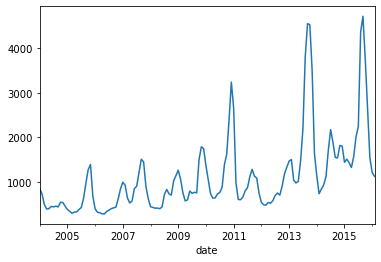

In [45]:
data_mum.priceMod.plot()
plt.show()

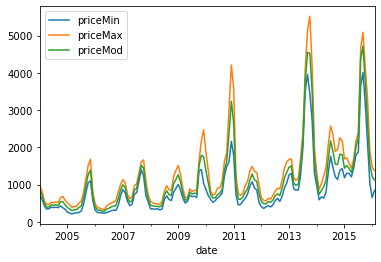

In [46]:
data_mum.plot(kind="line", y=["priceMin" ,"priceMax" ,"priceMod"])
plt.show()

To calculate the range of change, we will create a new price difference variable - which is the difference between the priceMin and priceMax

In [48]:
data_mum["priceDiff"] = data_mum["priceMax"] - data_mum["priceMin"]
data_mum.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date,monthVal,priceDiff
date,,,,,,,,,,,,
2004-01,MUMBAI,January,2004,267100,719,971,849,MS,MUMBAI,2004-01-01,1,252
2004-02,MUMBAI,February,2004,239350,614,834,736,MS,MUMBAI,2004-02-01,2,220
2004-03,MUMBAI,March,2004,238000,436,557,498,MS,MUMBAI,2004-03-01,3,121
2004-04,MUMBAI,April,2004,198200,346,475,397,MS,MUMBAI,2004-04-01,4,129
2004-05,MUMBAI,May,2004,166430,357,466,405,MS,MUMBAI,2004-05-01,5,109


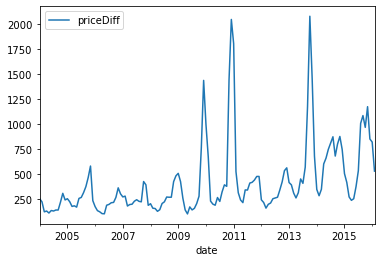

In [49]:
data_mum.plot(y="priceDiff")
plt.show()

In [47]:
# a new column for the intger month
data_mum["monthVal"] = pd.DatetimeIndex(data_mum["date"]).month
data_mum.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date,monthVal
date,,,,,,,,,,,
2004-01,MUMBAI,January,2004,267100,719,971,849,MS,MUMBAI,2004-01-01,1
2004-02,MUMBAI,February,2004,239350,614,834,736,MS,MUMBAI,2004-02-01,2
2004-03,MUMBAI,March,2004,238000,436,557,498,MS,MUMBAI,2004-03-01,3
2004-04,MUMBAI,April,2004,198200,346,475,397,MS,MUMBAI,2004-04-01,4
2004-05,MUMBAI,May,2004,166430,357,466,405,MS,MUMBAI,2004-05-01,5


In [50]:
data_mumPivot = pd.pivot_table(data_mum, values = "priceDiff", 
                             columns = "year", index = "monthVal")
data_mumPivot

year,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
monthVal,,,,,,,,,,,,,
1,252,252,173,270,202,506,998,1804,241,414,345,503,819
2,220,222,133,278,157,423,671,524,214,391,282,415,528
3,121,175,121,179,154,258,228,312,158,308,346,270,NaN
4,129,181,103,194,126,140,198,239,196,260,600,236,NaN
5,109,168,101,197,142,100,187,213,209,312,658,252,NaN
6,134,255,187,227,204,170,264,340,252,450,746,373,NaN
7,129,265,195,242,221,140,225,339,260,406,810,532,NaN
8,139,313,212,226,269,156,321,409,267,568,872,1006,NaN
9,139,373,215,221,267,204,391,416,340,1175,679,1084,NaN


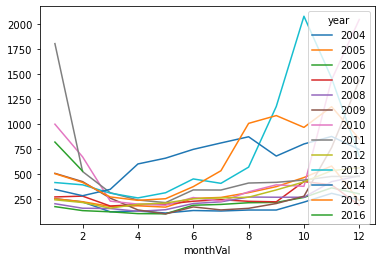

In [51]:
data_mumPivot.plot()
plt.show()

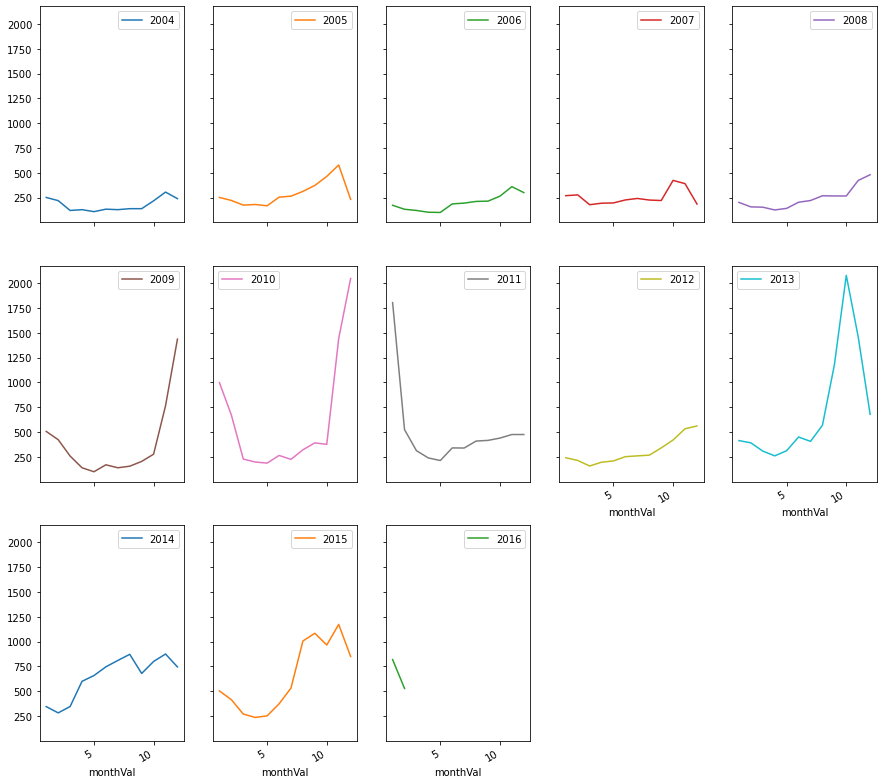

In [52]:
data_mumPivot.plot(subplots = True, figsize=(15, 15), layout=(3, 5), sharey=True)
plt.show()

In [53]:
# Set parameters for better visualization
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15, 10)

In [54]:
data.date = pd.DatetimeIndex(data.date)

In [55]:
data.index = pd.PeriodIndex(data.date, freq="M")
data.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
date,,,,,,,,,,
2005-01,ABOHAR(PB),January,2005,2350,404,493,446,PB,ABOHAR,2005-01-01
2006-01,ABOHAR(PB),January,2006,900,487,638,563,PB,ABOHAR,2006-01-01
2010-01,ABOHAR(PB),January,2010,790,1283,1592,1460,PB,ABOHAR,2010-01-01
2011-01,ABOHAR(PB),January,2011,245,3067,3750,3433,PB,ABOHAR,2011-01-01
2012-01,ABOHAR(PB),January,2012,1035,523,686,605,PB,ABOHAR,2012-01-01


# Onion price in Bangalore

In [57]:
data_mum = data.loc[data.city == "MUMBAI"].copy()
data_mum.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
date,,,,,,,,,,
2004-01,MUMBAI,January,2004,267100,719,971,849,MS,MUMBAI,2004-01-01
2005-01,MUMBAI,January,2005,275845,261,513,387,MS,MUMBAI,2005-01-01
2006-01,MUMBAI,January,2006,228000,315,488,402,MS,MUMBAI,2006-01-01
2007-01,MUMBAI,January,2007,205200,866,1136,997,MS,MUMBAI,2007-01-01
2008-01,MUMBAI,January,2008,267550,348,550,448,MS,MUMBAI,2008-01-01


In [58]:
data_mum = data_mum.drop(["market","month","year","priceMin","priceMax","state","city"], axis=1)
data_mum.head()

,quantity,priceMod,date
date,,,
2004-01,267100,849,2004-01-01
2005-01,275845,387,2005-01-01
2006-01,228000,402,2006-01-01
2007-01,205200,997,2007-01-01
2008-01,267550,448,2008-01-01


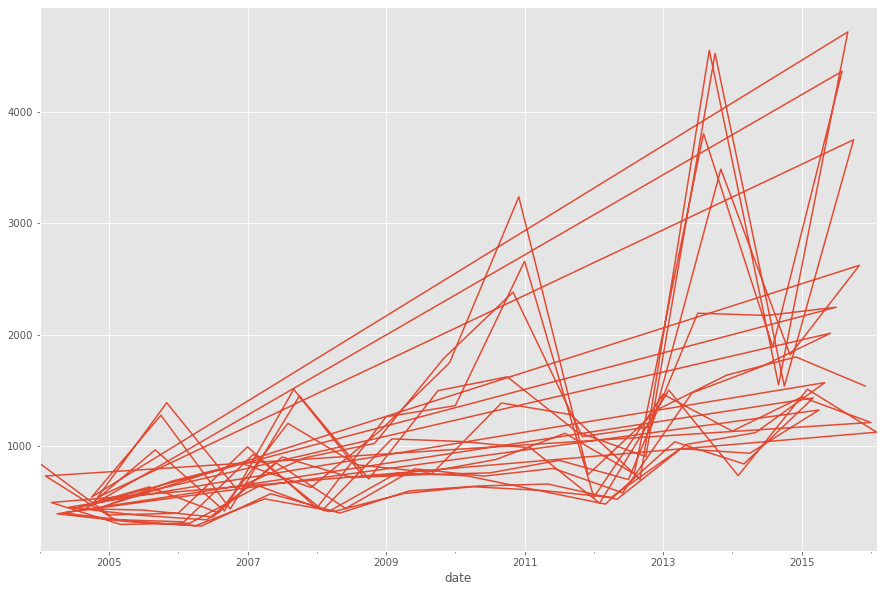

In [59]:
data_mum.priceMod.plot()
plt.show()

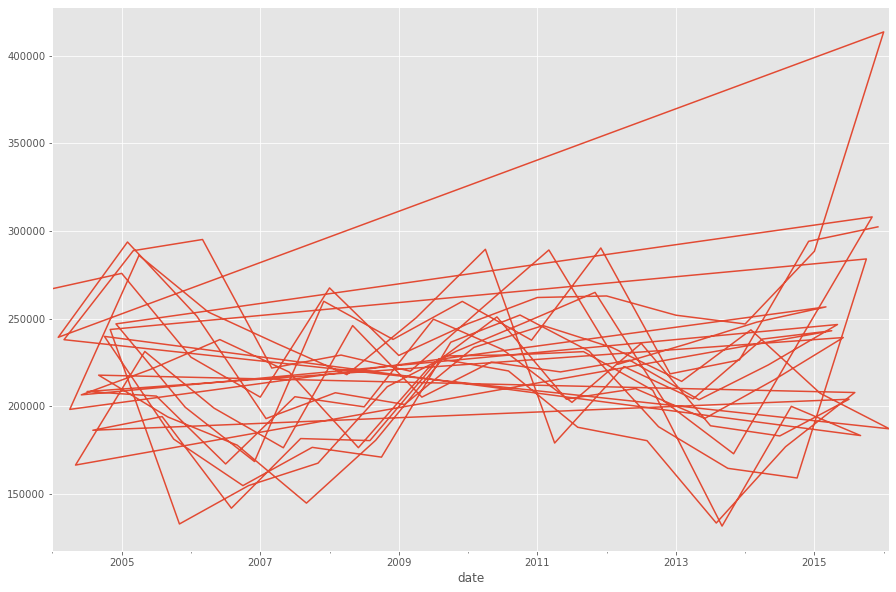

In [60]:
data_mum.quantity.plot()
plt.show()

# Log Transformation

<AxesSubplot:ylabel='Frequency'>

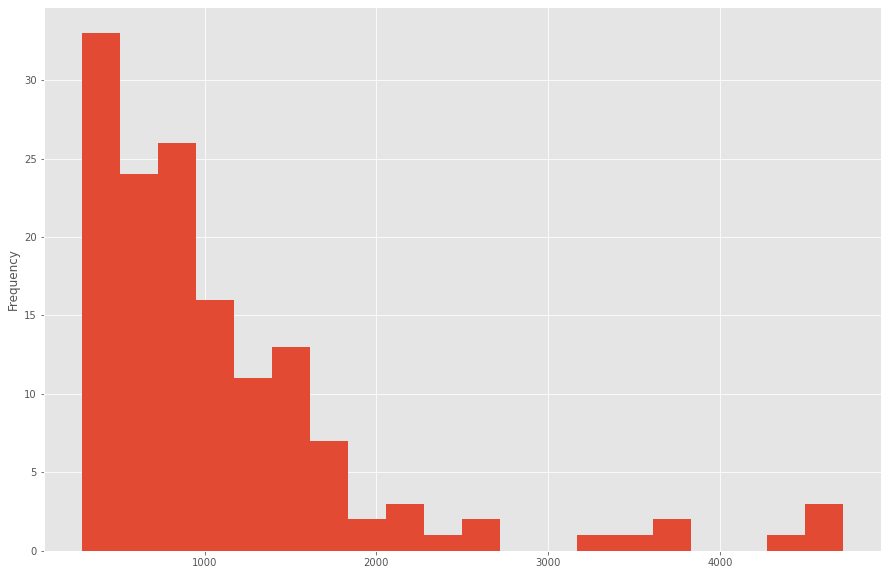

In [61]:
data_mum.priceMod.plot(kind="hist", bins=20)

<AxesSubplot:ylabel='Frequency'>

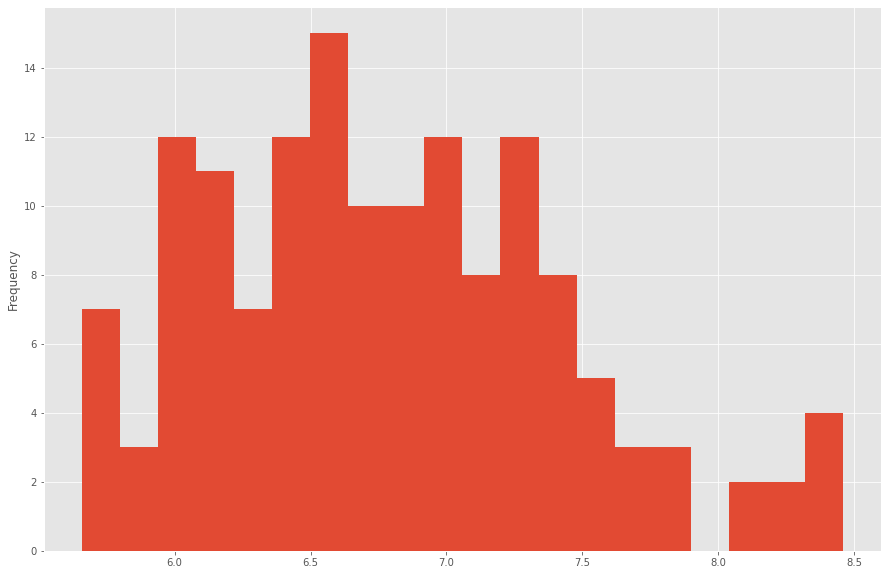

In [62]:
data_mum["log_priceMod"] = np.log(data_mum.priceMod)
data_mum.log_priceMod.plot(kind="hist", bins=20)

# Basic Time Series Model

We will build a time-series forecasting model to get a forecast for Onion prices. Let us start with the three most basic models -

Mean Constant Model
Linear Trend Model
Random Walk Model

# 1. Mean Constant Model

In [64]:
data_mum_mean = data_mum.log_priceMod.mean()
data_mum["mean_price"] = np.exp(data_mum_mean)
data_mum.head()

,quantity,priceMod,date,log_priceMod,mean_price
date,,,,,
2004-01,267100,849,2004-01-01,7,889
2005-01,275845,387,2005-01-01,6,889
2006-01,228000,402,2006-01-01,6,889
2007-01,205200,997,2007-01-01,7,889
2008-01,267550,448,2008-01-01,6,889


<AxesSubplot:xlabel='date'>

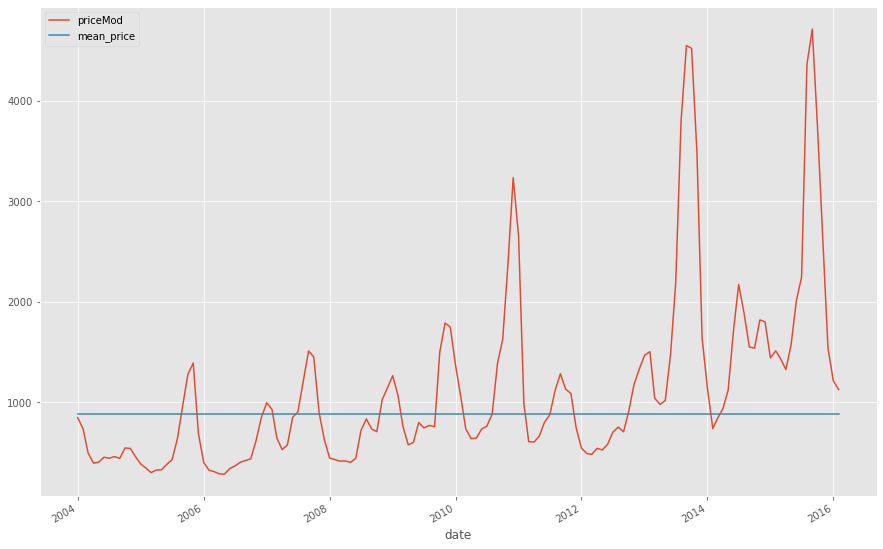

In [65]:
data_mum.plot(kind="line", x="date", y=["priceMod", "mean_price"])

# Evaluate this model using RSME

In [66]:
def RMSE(actual, predicted):
    mse = (actual - predicted)**2
    rmse = np.sqrt(mse.sum()/mse.count())
    return rmse

In [68]:
mean_modelRMSE = RMSE(data_mum.priceMod, data_mum.mean_price)
mean_modelRMSE


908.4772843986449

In [70]:
Result_data = pd.DataFrame(columns =["Model","Forcast","RMSE"])
Result_data.loc[0,"Model"] = "Mean Model"
Result_data.loc[0,"Forcast"] = np.exp(data_mum_mean)
Result_data.loc[0,"RMSE"] = mean_modelRMSE
Result_data

,Model,Forcast,RMSE
0,Mean Model,9e+02,9e+02


# 2. Linear Trend Model

Let us start by plotting a linear trend model between log_priceMod and time.

However to do linear regression, we need a numeric indicator for time period - Let us create that

In [71]:
data_mum.head()

,quantity,priceMod,date,log_priceMod,mean_price
date,,,,,
2004-01,267100,849,2004-01-01,7,889
2005-01,275845,387,2005-01-01,6,889
2006-01,228000,402,2006-01-01,6,889
2007-01,205200,997,2007-01-01,7,889
2008-01,267550,448,2008-01-01,6,889


In [72]:
data_mum.info()

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 146 entries, 2004-01 to 2015-12
Freq: M
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   quantity      146 non-null    int64         
 1   priceMod      146 non-null    int64         
 2   date          146 non-null    datetime64[ns]
 3   log_priceMod  146 non-null    float64       
 4   mean_price    146 non-null    float64       
dtypes: datetime64[ns](1), float64(2), int64(2)
memory usage: 6.8 KB


In [73]:
# Converting the date into datetinme delta starting from 0
data_mum["timeindex"] = data_mum.date - data_mum.date.min()
data_mum.head()

,quantity,priceMod,date,log_priceMod,mean_price,timeindex
date,,,,,,
2004-01,267100,849,2004-01-01,7,889,0 days
2005-01,275845,387,2005-01-01,6,889,366 days
2006-01,228000,402,2006-01-01,6,889,731 days
2007-01,205200,997,2007-01-01,7,889,1096 days
2008-01,267550,448,2008-01-01,6,889,1461 days


In [74]:
data_mum.dtypes

quantity                  int64
priceMod                  int64
date             datetime64[ns]
log_priceMod            float64
mean_price              float64
timeindex       timedelta64[ns]
dtype: object

In [75]:
# converting the timeindex into months using timedelta
data_mum["timeindex"] = data_mum["timeindex"]/np.timedelta64(1,"M")
data_mum.head()

,quantity,priceMod,date,log_priceMod,mean_price,timeindex
date,,,,,,
2004-01,267100,849,2004-01-01,7,889,0
2005-01,275845,387,2005-01-01,6,889,12
2006-01,228000,402,2006-01-01,6,889,24
2007-01,205200,997,2007-01-01,7,889,36
2008-01,267550,448,2008-01-01,6,889,48


In [76]:
data_mum["timeindex"] = data_mum["timeindex"].round(0).astype(int)
data_mum.tail()

,quantity,priceMod,date,log_priceMod,mean_price,timeindex
date,,,,,,
2011-12,290350,749,2011-12-01,7,889,95
2012-12,218500,1330,2012-12-01,7,889,107
2013-12,226385,1639,2013-12-01,7,889,119
2014-12,294150,1802,2014-12-01,7,889,131
2015-12,302409,1542,2015-12-01,7,889,143


# Apply the linear model

In [77]:
linear_model = smf.ols('log_priceMod ~ timeindex', data = data_mum).fit()
linear_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           log_priceMod   R-squared:                       0.473
Model:                            OLS   Adj. R-squared:                  0.469
Method:                 Least Squares   F-statistic:                     129.3
Date:                Mon, 15 Nov 2021   Prob (F-statistic):           8.89e-22
Time:                        16:01:59   Log-Likelihood:                -96.121
No. Observations:                 146   AIC:                             196.2
Df Residuals:                     144   BIC:                             202.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.0284      0.078     77.785      0.000       5.875       6.182
timeindex      0.0105      0.001     11.370      0.000       0.009       0.012
==============================================================================
Omnibus:                        7.658   Durbin-Watson:                   1.795
Prob(Omnibus):                  0.022   Jarque-Bera (JB):                8.054
Skew:                           0.566   Prob(JB):                       0.0178
Kurtosis:                       2.791   Cond. No.                         167.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [78]:
linear_model_pred = linear_model.predict()
linear_model_pred

array([6.02841087, 6.15450176, 6.28059265, 6.40668353, 6.53277442,
       6.65886531, 6.7849562 , 6.91104708, 7.03713797, 7.16322886,
       7.28931975, 7.41541064, 7.54150152, 6.03891844, 6.16500933,
       6.29110022, 6.41719111, 6.543282  , 6.66937288, 6.79546377,
       6.92155466, 7.04764555, 7.17373643, 7.29982732, 7.42591821,
       7.5520091 , 6.04942602, 6.17551691, 6.30160779, 6.42769868,
       6.55378957, 6.67988046, 6.80597134, 6.93206223, 7.05815312,
       7.18424401, 7.3103349 , 7.43642578, 6.05993359, 6.18602448,
       6.31211537, 6.43820626, 6.56429714, 6.69038803, 6.81647892,
       6.94256981, 7.06866069, 7.19475158, 7.32084247, 7.44693336,
       6.07044117, 6.19653205, 6.32262294, 6.44871383, 6.57480472,
       6.70089561, 6.82698649, 6.95307738, 7.07916827, 7.20525916,
       7.33135004, 7.45744093, 6.08094874, 6.20703963, 6.33313052,
       6.4592214 , 6.58531229, 6.71140318, 6.83749407, 6.96358495,
       7.08967584, 7.21576673, 7.34185762, 7.46794851, 6.09145

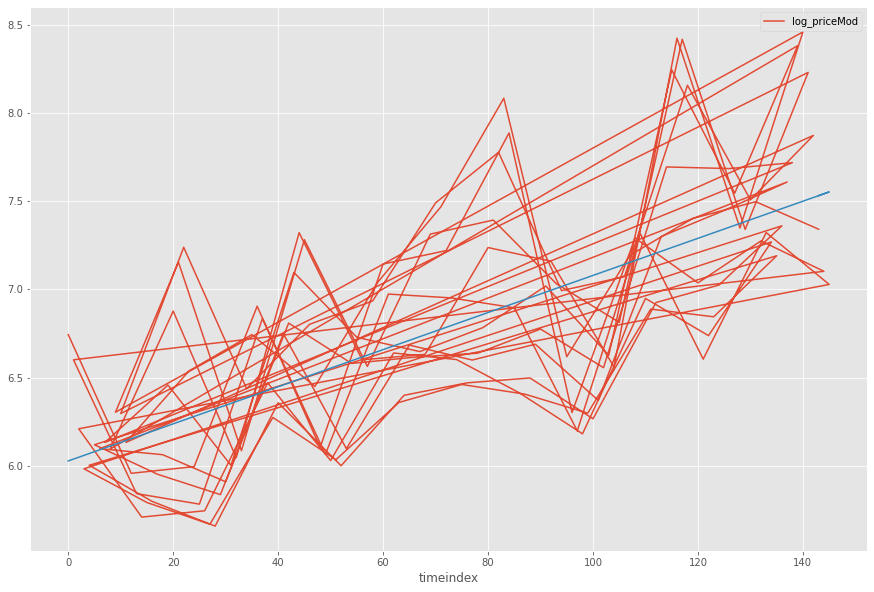

In [80]:
data_mum.plot(kind = "line", x="timeindex", y="log_priceMod")
plt.plot(data_mum.timeindex, linear_model_pred)

<AxesSubplot:xlabel='date'>

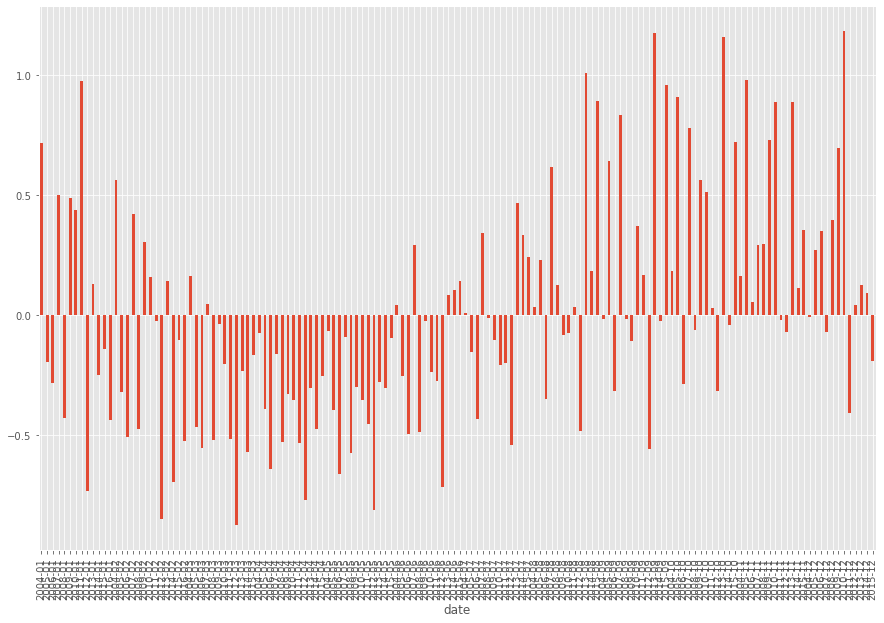

In [81]:
linear_model.resid.plot(kind="bar")

In [86]:
# Manual Calculation
model_linear_forecast_manual = 0.0093 * 146 + 6.1121
model_linear_forecast_manual

7.4699

In [82]:
data_mum["linear_price"] = np.exp(linear_model_pred)
data_mum.head()

,quantity,priceMod,date,log_priceMod,mean_price,timeindex,linear_price
date,,,,,,,
2004-01,267100,849,2004-01-01,7,889,0,415
2005-01,275845,387,2005-01-01,6,889,12,471
2006-01,228000,402,2006-01-01,6,889,24,534
2007-01,205200,997,2007-01-01,7,889,36,606
2008-01,267550,448,2008-01-01,6,889,48,687


In [84]:
linear_model_RMSE = RMSE(data_mum.priceMod, data_mum.linear_price)
linear_model_RMSE

724.7073314178772

In [88]:
linear_model_quant = smf.ols('log_priceMod ~ timeindex + np.log(quantity)', data = data_mum).fit()
linear_model_quant.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           log_priceMod   R-squared:                       0.519
Model:                            OLS   Adj. R-squared:                  0.512
Method:                 Least Squares   F-statistic:                     77.15
Date:                Mon, 15 Nov 2021   Prob (F-statistic):           1.88e-23
Time:                        16:09:01   Log-Likelihood:                -89.461
No. Observations:                 146   AIC:                             184.9
Df Residuals:                     143   BIC:                             193.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           15.2955      2.508      6.097      0.000      10.337      20.254
timeindex            0.0109      0.001     12.216      0.000       0.009       0.013
np.log(quantity)    -0.7562      0.205     -3.696      0.000      -1.161      -0.352
==============================================================================
Omnibus:                        4.787   Durbin-Watson:                   1.786
Prob(Omnibus):                  0.091   Jarque-Bera (JB):                4.880
Skew:                           0.429   Prob(JB):                       0.0872
Kurtosis:                       2.742   Cond. No.                     5.70e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.7e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

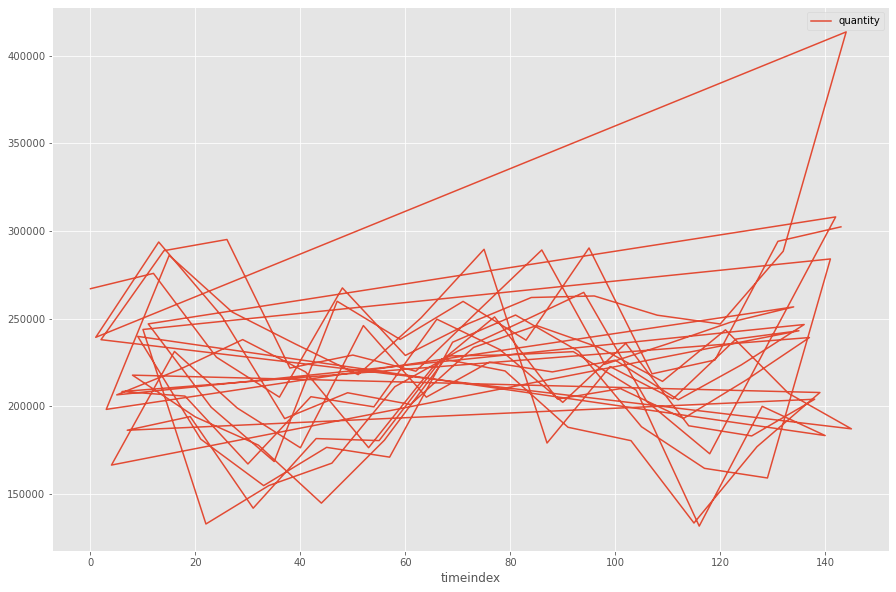

In [89]:
data_mum["linear_price_quant"] = np.exp(linear_model_quant.predict())
data_mum.plot(kind = "line", x="timeindex", y = "quantity")
plt.show()

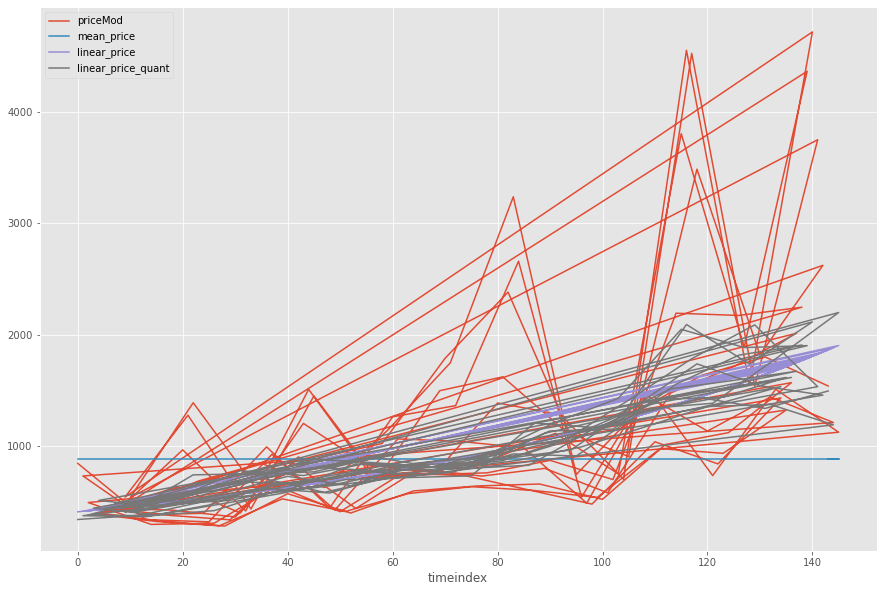

In [90]:
data_mum.plot(kind="line", x="timeindex", y = ["priceMod", "mean_price", 
                                             "linear_price", "linear_price_quant"])
plt.show()

# Random Walk Model

In [91]:
data_mum["shift_log_priceMod"] = data_mum.log_priceMod.shift()
data_mum.head()

,quantity,priceMod,date,log_priceMod,mean_price,timeindex,linear_price,linear_price_quant,shift_log_priceMod
date,,,,,,,,,
2004-01,267100,849,2004-01-01,7,889,0,415,346,NaN
2005-01,275845,387,2005-01-01,6,889,12,471,385,7
2006-01,228000,402,2006-01-01,6,889,24,534,507,6
2007-01,205200,997,2007-01-01,7,889,36,606,625,6
2008-01,267550,448,2008-01-01,6,889,48,687,583,7


<AxesSubplot:xlabel='shift_log_priceMod', ylabel='log_priceMod'>

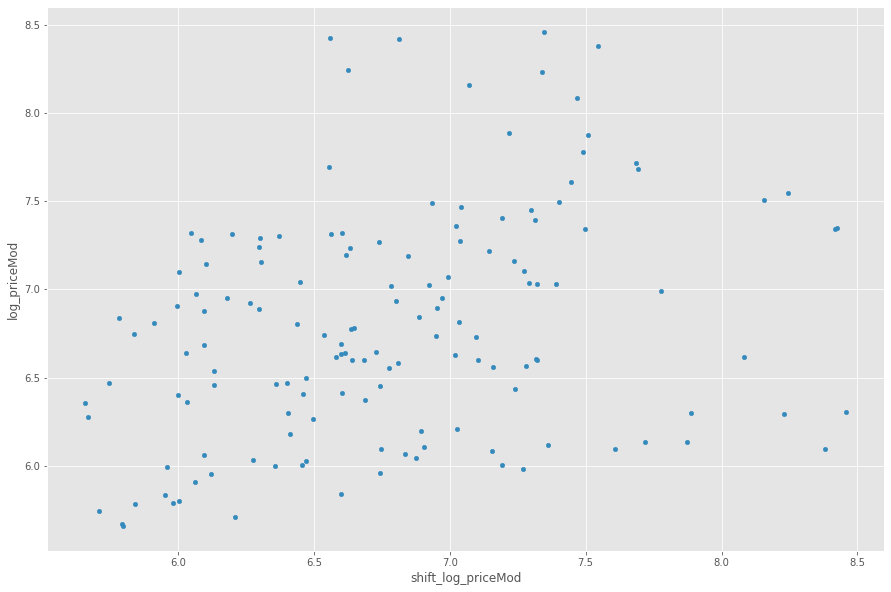

In [92]:
data_mum.plot(kind="scatter", x="shift_log_priceMod", y ="log_priceMod", s=20 )

In [94]:
data_mum["random_price"] = np.exp(data_mum.shift_log_priceMod)
data_mum.head()

,quantity,priceMod,date,log_priceMod,mean_price,timeindex,linear_price,linear_price_quant,shift_log_priceMod,log_priceMod_diff,random_price
date,,,,,,,,,,,
2004-01,267100,849,2004-01-01,7,889,0,415,346,NaN,NaN,NaN
2005-01,275845,387,2005-01-01,6,889,12,471,385,7,-8e-01,849
2006-01,228000,402,2006-01-01,6,889,24,534,507,6,4e-02,387
2007-01,205200,997,2007-01-01,7,889,36,606,625,6,9e-01,402
2008-01,267550,448,2008-01-01,6,889,48,687,583,7,-8e-01,997


In [97]:
# evaluate the random walk model
random_model_RMSE = RMSE(data_mum.priceMod, data_mum.random_price)
random_model_RMSE

1132.4887241579172

<AxesSubplot:xlabel='date'>

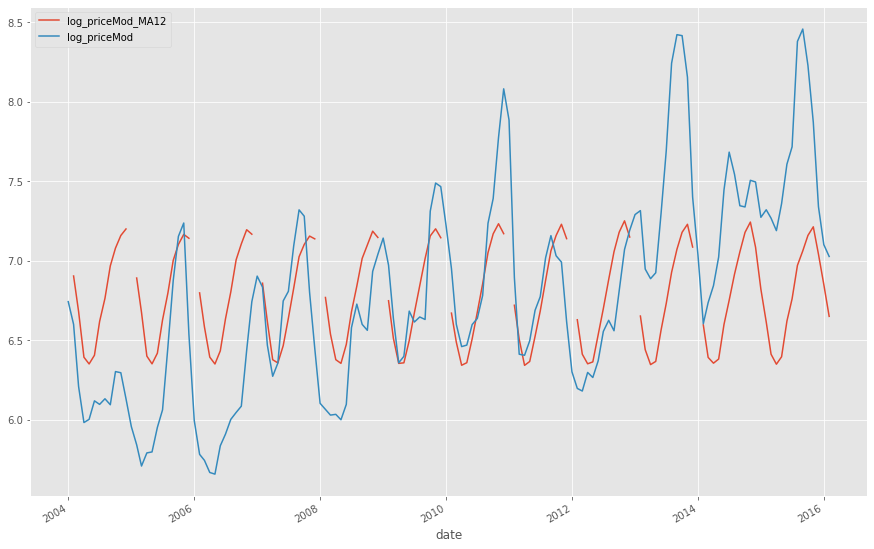

In [106]:
data_mum["log_priceMod_MA12"] = data_mum.log_priceMod.rolling(12).mean()
data_mum.plot(kind="line", y=["log_priceMod_MA12", "log_priceMod"])

In [107]:
data_mum["MA12_price"] = np.exp(data_mum.log_priceMod_MA12)
data_mum.sample(5)

,quantity,priceMod,date,log_priceMod,mean_price,timeindex,linear_price,linear_price_quant,shift_log_priceMod,log_priceMod_diff,random_price,log_priceMod_MA12,MA12_price
date,,,,,,,,,,,,,
2013-09-01,131590,4550,2013-09-01,8,889,116,1404,2093,7,2e+00,707,7,1180
2009-08-01,227150,771,2009-08-01,7,889,67,839,812,7,-8e-02,836,7,939
2005-03-01,288800,302,2005-03-01,6,889,14,481,380,6,-5e-01,498,7,793
2012-03-01,224000,484,2012-03-01,6,889,98,1162,1150,6,-2e-01,610,6,610
2008-05-01,246050,404,2008-05-01,6,889,52,717,649,6,-4e-01,577,6,576


In [109]:
MA_model_forcast = data_mum.log_priceMod_MA12.tail(12).mean()

# Evaluate MA12 model

In [112]:
MA12_model_RMSE = RMSE(data_mum.priceMod, data_mum.MA12_price)
MA12_model_RMSE

841.8072265328718

In [114]:
def adata(ts):
    # Determing rolling statistics
    rolmean = ts.rolling(window=12).mean()
    rolstd = ts.rolling(window=12).std()

    #Plot rolling statistics:
    ts.plot(color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    # Calculate Adata factors
    adatatest = adatauller(ts, autolag='AIC')
    adataoutput = pd.Series(adatatest[0:4], index=['Test Statistic','p-value','# of Lags Used',
                                              'Number of Observations Used'])
    for key,value in adatatest[4].items():
        adataoutput['Critical Value (%s)'%key] = value
    return adataoutput

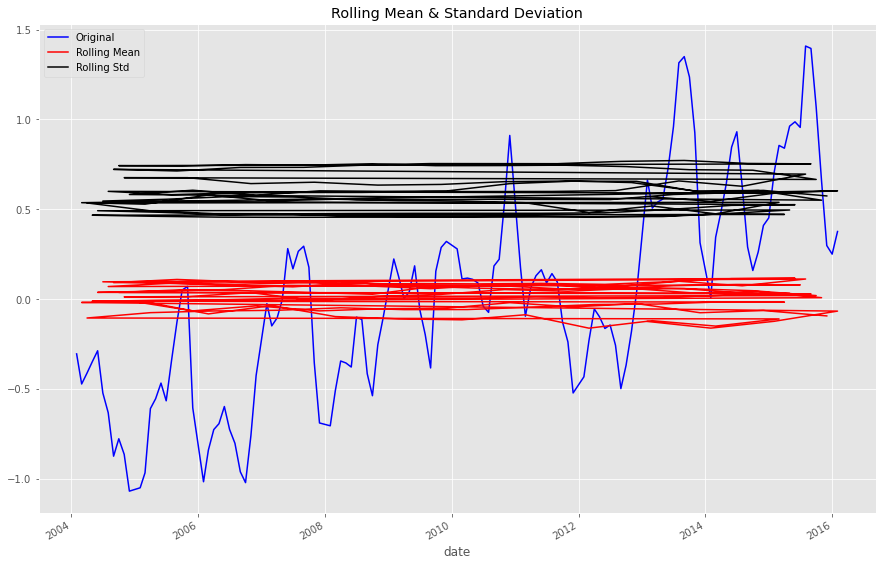

Test Statistic                -2e+00
p-value                        3e-01
# of Lags Used                 1e+01
Number of Observations Used    1e+02
Critical Value (1%)           -3e+00
Critical Value (5%)           -3e+00
Critical Value (10%)          -3e+00
dtype: float64

In [116]:
# Test remaining part for Stationary
ts = data_mum.log_priceMod - data_mum.log_priceMod_MA12
ts.dropna(inplace= True)
adata(ts)

# Differencing
One of the most common methods of dealing with both trend and seasonality is differencing. In this technique, we take the difference of the observation at a particular instant with that at the previous instant. This mostly works well in improving stationarity. We have already done first order difference earlier

<AxesSubplot:xlabel='date'>

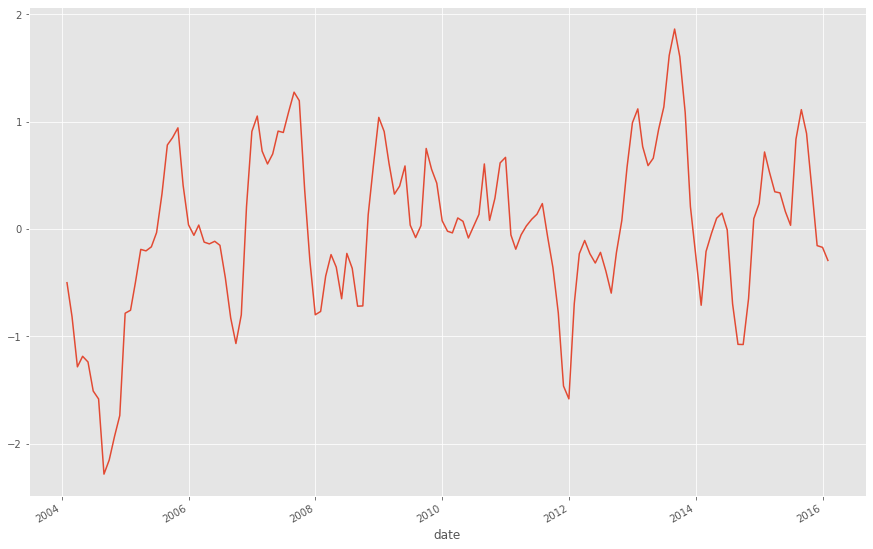

In [117]:
data_mum.log_priceMod_diff.plot()

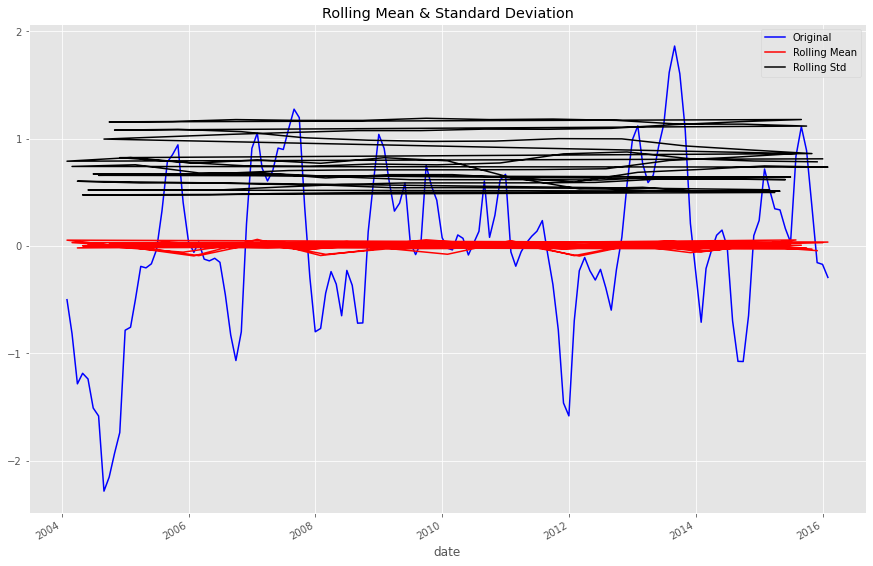

Test Statistic                -3e+00
p-value                        3e-02
# of Lags Used                 1e+01
Number of Observations Used    1e+02
Critical Value (1%)           -3e+00
Critical Value (5%)           -3e+00
Critical Value (10%)          -3e+00
dtype: float64

In [118]:
# Test remaining part for Stationary
ts = data_mum.log_priceMod_diff
ts.dropna(inplace = True)
adata(ts)


Test for stationarity:
If the test statistic is less than the critical value, we can reject the null hypothesis (aka the series is stationary). When the test statistic is greater than the critical value, we fail to reject the null hypothesis (which means the series is not stationary).

# Time Series Decomposition

In [119]:
from statsmodels.tsa.seasonal import seasonal_decompose

data_mum.index = pd.to_datetime(data_mum.date)
data_mum.head()

,quantity,priceMod,date,log_priceMod,mean_price,timeindex,linear_price,linear_price_quant,shift_log_priceMod,log_priceMod_diff,random_price,log_priceMod_MA12,MA12_price
date,,,,,,,,,,,,,
2004-01-01,267100,849,2004-01-01,7,889,0,415,346,NaN,NaN,NaN,NaN,NaN
2005-01-01,275845,387,2005-01-01,6,889,12,471,385,7,-8e-01,849,NaN,NaN
2006-01-01,228000,402,2006-01-01,6,889,24,534,507,6,4e-02,387,NaN,NaN
2007-01-01,205200,997,2007-01-01,7,889,36,606,625,6,9e-01,402,NaN,NaN
2008-01-01,267550,448,2008-01-01,6,889,48,687,583,7,-8e-01,997,NaN,NaN


# ARIMA Model

In [122]:
ts = data_mum.log_priceMod
ts_diff = data_mum.log_priceMod_diff
ts_diff.dropna(inplace = True)

In [123]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(ts_diff, nlags=20)
lag_acf

C:\Users\91724\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:662: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


array([ 1.        , -0.54612312,  0.35974009, -0.48269918,  0.31064144,
       -0.28581108,  0.25488628, -0.17927192,  0.20121241, -0.38328221,
        0.23712336, -0.33378314,  0.65536578, -0.26709031,  0.18329631,
       -0.31617105,  0.16054614, -0.14311553,  0.12853298, -0.08896203,
        0.17512094])

# ACF Plot

<AxesSubplot:>

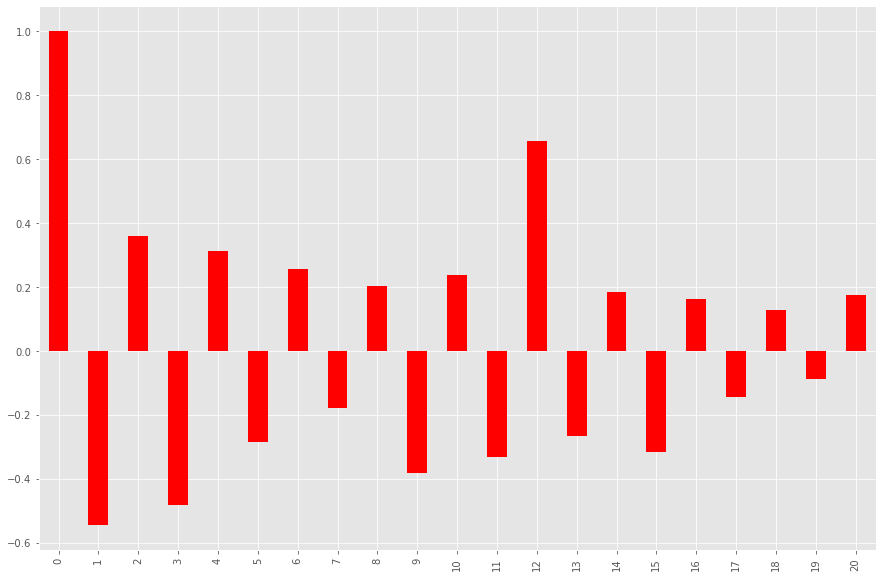

In [124]:
ACF = pd.Series(lag_acf)
ACF.plot(kind="bar", color="red")

# PACF plot

<AxesSubplot:>

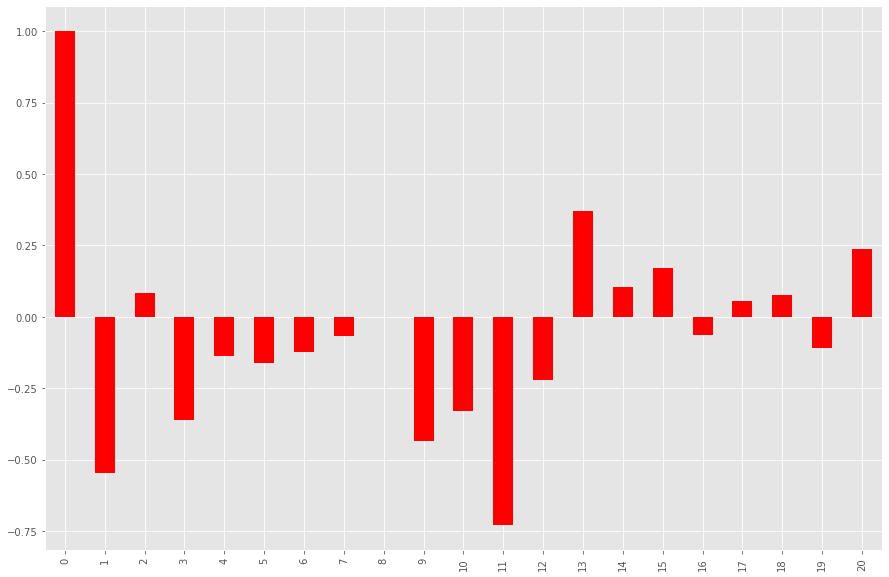

In [125]:
lag_pacf = pacf(ts_diff, nlags=20, method='ols')
PACF = pd.Series(lag_pacf)
PACF.plot(kind="bar", color="red")

# Implement ARIMA model

In [126]:
from statsmodels.tsa.arima_model import ARIMA

In [127]:
ts_diff.head()

date
2005-01-01   -8e-01
2006-01-01    4e-02
2007-01-01    9e-01
2008-01-01   -8e-01
2009-01-01    1e+00
Name: log_priceMod_diff, dtype: float64

In [128]:
ARIMA_model = ARIMA(ts_diff, order=(1,0,1))
ARIMA_result = ARIMA_model.fit(disp = -1)
ARIMA_result.fittedvalues.head()

C:\Users\91724\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\91724\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency

date
2005-01-01    5e-03
2006-01-01    3e-01
2007-01-01    2e-01
2008-01-01   -4e-01
2009-01-01    2e-01
dtype: float64

<AxesSubplot:xlabel='date'>

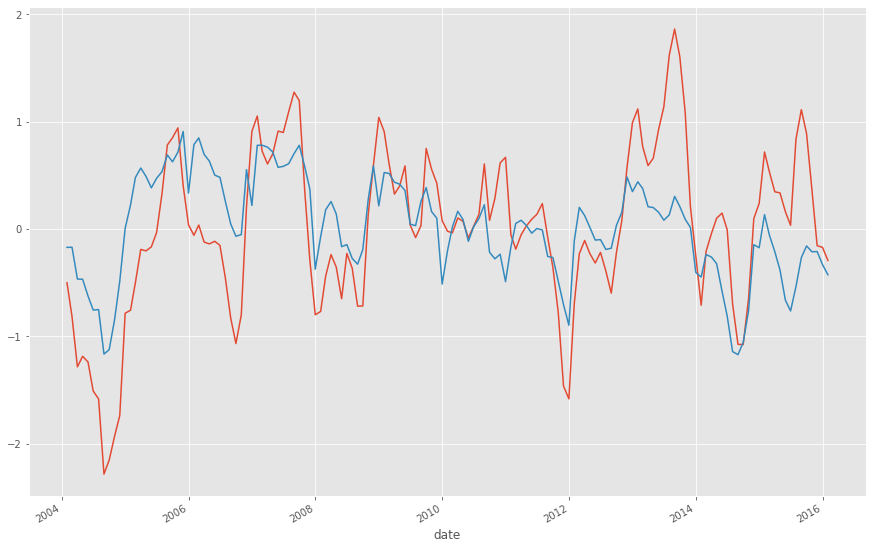

In [129]:
ts_diff.plot()
ARIMA_result.fittedvalues.plot()

In [130]:
ts_diff.sum()

0.5967763678119269

In [131]:
predictions_ARIMA_diff = pd.Series(ARIMA_result.fittedvalues, copy=True)
predictions_ARIMA_diff.tail()

date
2011-12-01   -7e-01
2012-12-01    5e-01
2013-12-01    1e-02
2014-12-01   -1e-01
2015-12-01   -2e-01
dtype: float64

In [132]:
predictions_ARIMA_diff.sum()

1.971422567800416

In [133]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
predictions_ARIMA_diff_cumsum.tail()

date
2011-12-01    2
2012-12-01    2
2013-12-01    2
2014-12-01    2
2015-12-01    2
dtype: float64